In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./book_genres.csv", sep=",", error_bad_lines=False)
df.head()

C:\Users\snimn\AppData\Local\Temp\ipykernel_5696\3524555637.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("./book_genres.csv", sep=",", error_bad_lines=False)


,Unnamed: 0,Title,Genre
0,0,When You Are Engulfed in Flames,Humor
1,1,Slaughterhouse-Five,"Fiction,Classics,Science Fiction"
2,2,Crow Mary,Historical Fiction
3,3,"The Six Deaths of the Saint (Into Shadow, #3)","Horror,Historical Fiction"
4,4,The Offing,"Poetry,Travel"


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Title,Genre
0,When You Are Engulfed in Flames,Humor
1,Slaughterhouse-Five,"Fiction,Classics,Science Fiction"
2,Crow Mary,Historical Fiction
3,"The Six Deaths of the Saint (Into Shadow, #3)","Horror,Historical Fiction"
4,The Offing,"Poetry,Travel"


In [4]:
df['Genre'] = df['Genre'].str.split(',')
df.head()

,Title,Genre
0,When You Are Engulfed in Flames,[Humor]
1,Slaughterhouse-Five,"[Fiction, Classics, Science Fiction]"
2,Crow Mary,[Historical Fiction]
3,"The Six Deaths of the Saint (Into Shadow, #3)","[Horror, Historical Fiction]"
4,The Offing,"[Poetry, Travel]"


In [5]:
# Create a new DataFrame where each row corresponds to a book-genre pair
book_genres_df = df.explode('Genre')

# Perform data analysis based on genres
genre_counts = book_genres_df['Genre'].value_counts()
genre_counts

Young Adult           246
Contemporary          245
Fantasy               240
Fiction               238
Mystery               238
Romance               236
Historical Fiction    236
Thriller              234
Horror                227
Science Fiction       224
Suspense              219
Nonfiction            216
LGBT                  211
History               208
Crime                 205
Comics                203
Paranormal            201
Graphic Novels        196
Manga                 195
Humor                 192
Childrens             184
Sports                183
Memoir                183
Biography             169
Chick Lit             163
Music                 162
Science               162
Christian             159
Travel                157
Poetry                155
Art                   154
Psychology            153
Business              153
Religion              151
Philosophy            149
Cookbooks             149
Spirituality          149
Self Help             147
Classics    

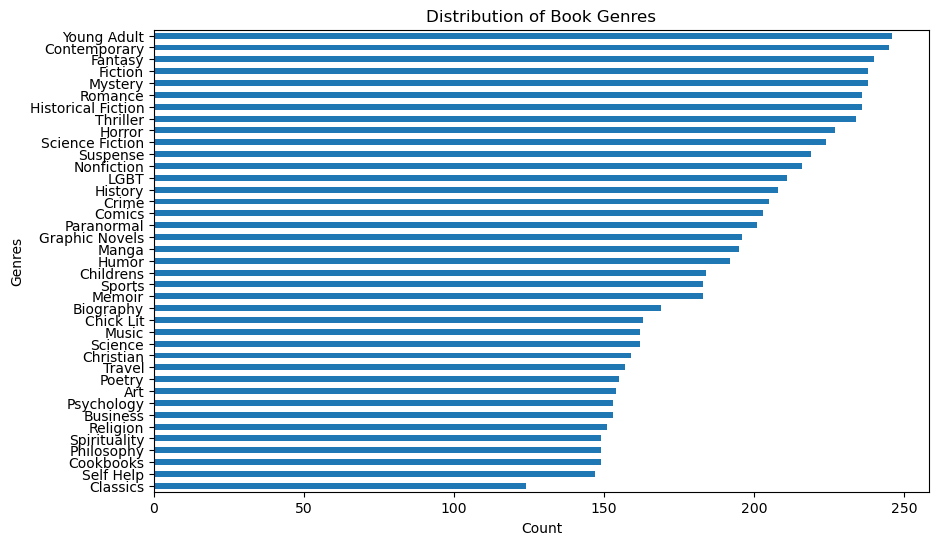

In [16]:
# Count the occurrences of each label
label_counts = book_genres_df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.sort_values().plot(kind='barh')
plt.title('Distribution of Book Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

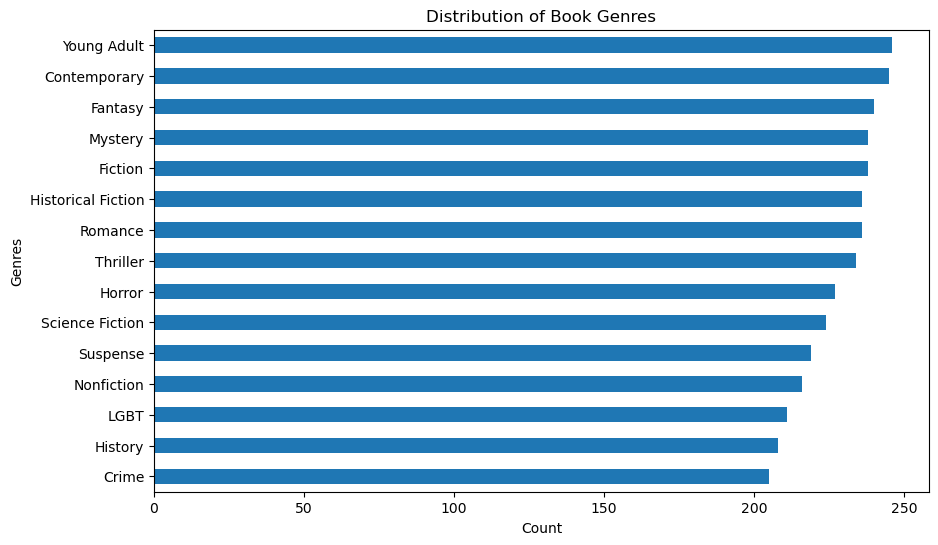

In [18]:
# Count the occurrences of each label
label_counts = book_genres_df['Genre'].value_counts().head(15)

plt.figure(figsize=(10, 6))
label_counts.sort_values().plot(kind='barh')
plt.title('Distribution of Book Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [19]:
df.shape

(4621, 2)

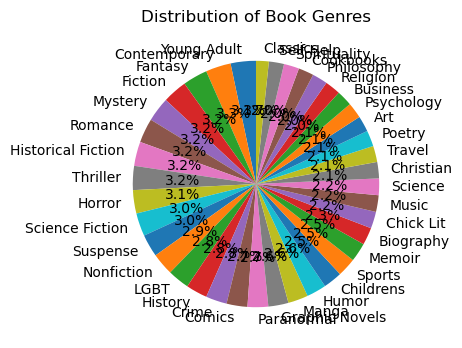

In [20]:
# Count the occurrences of each label
label_counts = book_genres_df['Genre'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Genres')
plt.show()

In [29]:
# Define the emotion-genre mapping
emotion_genre_mapping = {
    'Angry': ['Family', 'Drama', 'Romance', 'Travel'],
    'Disgust': ['Musical', 'Fantasy', 'History'],
    'Fear': ['Musical', 'Fantasy', 'Action', 'Sports'],
    'Happy': ['Action', 'Thriller', 'Science Fiction'],
    'Sad': ['Drama', 'Romance', 'Comics'],
    'Surprise': ['Thriller', 'Mystery', 'Adventure', 'Horror']
}

# Create a new column 'emotion' and map it based on genres
book_genres_df['emotion'] = book_genres_df['Genre'].apply(lambda x: next((emotion for emotion, genres in emotion_genre_mapping.items() if any(genre in x for genre in genres)), None))

# Display the resulting DataFrame
book_genres_df.head()

,Title,Genre,emotion
0,When You Are Engulfed in Flames,Humor,None
1,Slaughterhouse-Five,Fiction,None
1,Slaughterhouse-Five,Classics,None
1,Slaughterhouse-Five,Science Fiction,Happy
2,Crow Mary,Historical Fiction,None


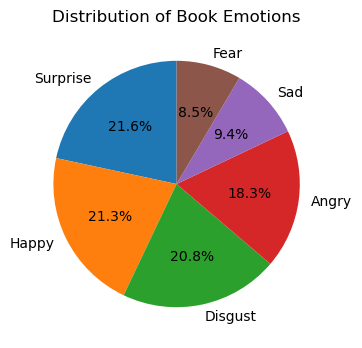

In [30]:
# Count the occurrences of each label
label_counts = book_genres_df['emotion'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Book Emotions')
plt.show()

In [31]:
none_emotion = book_genres_df.loc[book_genres_df['emotion'].isna()]
none_emotion.Genre.value_counts()

Young Adult           246
Contemporary          245
Fiction               238
Historical Fiction    236
Suspense              219
Nonfiction            216
LGBT                  211
Crime                 205
Paranormal            201
Graphic Novels        196
Manga                 195
Humor                 192
Childrens             184
Memoir                183
Biography             169
Chick Lit             163
Science               162
Music                 162
Christian             159
Poetry                155
Art                   154
Business              153
Psychology            153
Religion              151
Cookbooks             149
Spirituality          149
Philosophy            149
Self Help             147
Classics              124
Name: Genre, dtype: int64